<a href="https://colab.research.google.com/github/aaubs/ds-master/blob/main/notebooks/M3_2_Transformermodels_NLU_Applications_SBERT_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Applications of Transformer models can be categorized into three general areas including:

> 1. Similarity Search Engine
> 2. Clustering
> 3. Joint Image & Text Embeddings

In [ ]:
!pip install -U sentence_transformers --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 1.5 MB/s eta 0:00:00


# 1. Semantic Search Engine

In [ ]:
"""
This example demonstrates how we can perform semantic search for scientific publications.

As model, we use SPECTER (https://github.com/allenai/specter), which encodes paper titles and abstracts
into a vector space.

When can then use util.semantic_search() to find the most similar papers.

Colab example: https://colab.research.google.com/drive/12hfBveGHRsxhPIUMmJYrll2lFU4fOX06
"""
import json
import os
from sentence_transformers import SentenceTransformer, util

#First, we load the papers dataset (with title and abstract information)
dataset_file = 'emnlp2016-2018.json'

if not os.path.exists(dataset_file):
  util.http_get("https://sbert.net/datasets/emnlp2016-2018.json", dataset_file)

with open(dataset_file) as fIn:
  papers = json.load(fIn)

print(len(papers), "papers loaded")

#We then load the allenai-specter model with SentenceTransformers
model = SentenceTransformer('allenai-specter')

#To encode the papers, we must combine the title and the abstracts to a single string
paper_texts = [paper['title'] + '[SEP]' + paper['abstract'] for paper in papers[:32]]

#Compute embeddings for all papers
corpus_embeddings = model.encode(paper_texts, convert_to_tensor=True, show_progress_bar=True)


#We define a function, given title & abstract, searches our corpus for relevant (similar) papers
def search_papers(title, abstract):
  query_embedding = model.encode(title+'[SEP]'+abstract, convert_to_tensor=True)

  search_hits = util.semantic_search(query_embedding, corpus_embeddings)
  search_hits = search_hits[0]  #Get the hits for the first query

  print("\n\nPaper:", title)
  print("Most similar papers:")
  for hit in search_hits:
    related_paper = papers[hit['corpus_id']]
    print("{:.2f}\t{}\t{} {}".format(hit['score'], related_paper['title'], related_paper['venue'], related_paper['year']))

  0%|          | 0.00/1.10M [00:00<?, ?B/s]

974 papers loaded


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.71k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/622 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/331 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/222k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/462k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# This paper was the EMNLP 2019 Best Paper
search_papers(title='Specializing Word Embeddings (for Parsing) by Information Bottleneck',
              abstract='Pre-trained word embeddings like ELMo and BERT contain rich syntactic and semantic information, resulting in state-of-the-art performance on various tasks. We propose a very fast variational information bottleneck (VIB) method to nonlinearly compress these embeddings, keeping only the information that helps a discriminative parser. We compress each word embedding to either a discrete tag or a continuous vector. In the discrete version, our automatically compressed tags form an alternative tag set: we show experimentally that our tags capture most of the information in traditional POS tag annotations, but our tag sequences can be parsed more accurately at the same level of tag granularity. In the continuous version, we show experimentally that moderately compressing the word embeddings by our method yields a more accurate parser in 8 of 9 languages, unlike simple dimensionality reduction.')

# This paper was the EMNLP 2020 Best Paper
search_papers(title='Digital Voicing of Silent Speech',
              abstract='In this paper, we consider the task of digitally voicing silent speech, where silently mouthed words are converted to audible speech based on electromyography (EMG) sensor measurements that capture muscle impulses. While prior work has focused on training speech synthesis models from EMG collected during vocalized speech, we are the first to train from EMG collected during silently articulated speech. We introduce a method of training on silent EMG by transferring audio targets from vocalized to silent signals. Our method greatly improves intelligibility of audio generated from silent EMG compared to a baseline that only trains with vocalized data, decreasing transcription word error rate from 64% to 4% in one data condition and 88% to 68% in another. To spur further development on this task, we share our new dataset of silent and vocalized facial EMG measurements.')

# This paper was a EMNLP 2020 Honourable Mention Papers
search_papers(title='If beam search is the answer, what was the question?',
              abstract='Quite surprisingly, exact maximum a posteriori (MAP) decoding of neural language generators frequently leads to low-quality results. Rather, most state-of-the-art results on language generation tasks are attained using beam search despite its overwhelmingly high search error rate. This implies that the MAP objective alone does not express the properties we desire in text, which merits the question: if beam search is the answer, what was the question? We frame beam search as the exact solution to a different decoding objective in order to gain insights into why high probability under a model alone may not indicate adequacy. We find that beam search enforces uniform information density in text, a property motivated by cognitive science. We suggest a set of decoding objectives that explicitly enforce this property and find that exact decoding with these objectives alleviates the problems encountered when decoding poorly calibrated language generation models. Additionally, we analyze the text produced using various decoding strategies and see that, in our neural machine translation experiments, the extent to which this property is adhered to strongly correlates with BLEU.')

# This paper was a EMNLP 2020 Honourable Mention Papers
search_papers(title='Spot The Bot: A Robust and Efficient Framework for the Evaluation of Conversational Dialogue Systems',
              abstract='The lack of time efficient and reliable evalu-ation methods is hampering the development of conversational dialogue systems (chat bots). Evaluations that require humans to converse with chat bots are time and cost intensive, put high cognitive demands on the human judges, and tend to yield low quality results. In this work, we introduce Spot The Bot, a cost-efficient and robust evaluation framework that replaces human-bot conversations with conversations between bots. Human judges then only annotate for each entity in a conversation whether they think it is human or not (assuming there are humans participants in these conversations). These annotations then allow us to rank chat bots regarding their ability to mimic conversational behaviour of humans. Since we expect that all bots are eventually recognized as such, we incorporate a metric that measures which chat bot is able to uphold human-like be-havior the longest, i.e.Survival Analysis. This metric has the ability to correlate a bot’s performance to certain of its characteristics (e.g.fluency or sensibleness), yielding interpretable results. The comparably low cost of our frame-work allows for frequent evaluations of chatbots during their evaluation cycle. We empirically validate our claims by applying Spot The Bot to three domains, evaluating several state-of-the-art chat bots, and drawing comparisonsto related work. The framework is released asa ready-to-use tool.')

# EMNLP 2020 paper on making Sentence-BERT multilingual
search_papers(title='Making Monolingual Sentence Embeddings Multilingual using Knowledge Distillation',
              abstract='We present an easy and efficient method to extend existing sentence embedding models to new languages. This allows to create multilingual versions from previously monolingual models. The training is based on the idea that a translated sentence should be mapped to the same location in the vector space as the original sentence. We use the original (monolingual) model to generate sentence embeddings for the source language and then train a new system on translated sentences to mimic the original model. Compared to other methods for training multilingual sentence embeddings, this approach has several advantages: It is easy to extend existing models with relatively few samples to new languages, it is easier to ensure desired properties for the vector space, and the hardware requirements for training is lower. We demonstrate the effectiveness of our approach for 50+ languages from various language families. Code to extend sentence embeddings models to more than 400 languages is publicly available.')




Paper: Specializing Word Embeddings (for Parsing) by Information Bottleneck
Most similar papers:
0.85	Morphological Priors for Probabilistic Neural Word Embeddings	EMNLP 2016
0.84	Latent Tree Language Model	EMNLP 2016
0.82	Discourse Parsing with Attention-based Hierarchical Neural Networks	EMNLP 2016
0.80	Neural versus Phrase-Based Machine Translation Quality: a Case Study	EMNLP 2016
0.79	Natural Language Comprehension with the EpiReader	EMNLP 2016
0.78	Zero-Resource Translation with Multi-Lingual Neural Machine Translation	EMNLP 2016
0.77	Creating Causal Embeddings for Question Answering with Minimal Supervision	EMNLP 2016
0.77	Rule Extraction for Tree-to-Tree Transducers by Cost Minimization	EMNLP 2016
0.77	Context-Dependent Sense Embedding	EMNLP 2016
0.76	Supervised Distributional Hypernym Discovery via Domain Adaptation	EMNLP 2016


Paper: Digital Voicing of Silent Speech
Most similar papers:
0.71	Multi-view Response Selection for Human-Computer Conversation	EMNLP 2016
0.71	Neura

# Exercise

Implement a sematic search engine for this dataset?

In [ ]:
!pip install nlp datasets --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.2 MB/s eta 0:00:00
  Attempting uninstall: dill
    Found existing installation: dill 0.3.8
    Uninstalling dill-0.3.8:
      Successfully uninstalled dill-0.3.8


In [ ]:
from datasets import load_dataset

datasets = load_dataset('squad')
print(datasets)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/87599 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10570 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 87599
    })
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 10570
    })
})


In [ ]:
contexts = [item['context'] for item in datasets['train']]

# 2. Clustering

In [ ]:
"""
This is a simple application for sentence embeddings: clustering

Sentences are mapped to sentence embeddings and then k-mean clustering is applied.
"""
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

embedder = SentenceTransformer('all-MiniLM-L6-v2')

# Corpus with example sentences
corpus = ['A man is eating food.',
          'A man is eating a piece of bread.',
          'A man is eating pasta.',
          'The girl is carrying a baby.',
          'The baby is carried by the woman',
          'A man is riding a horse.',
          'A man is riding a white horse on an enclosed ground.',
          'A monkey is playing drums.',
          'Someone in a gorilla costume is playing a set of drums.',
          'A cheetah is running behind its prey.',
          'A cheetah chases prey on across a field.'
          ]
corpus_embeddings = embedder.encode(corpus)

# Perform kmean clustering
num_clusters = 5
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Cluster  1
['A man is eating food.', 'A man is eating a piece of bread.', 'A man is eating pasta.']

Cluster  2
['A cheetah is running behind its prey.', 'A cheetah chases prey on across a field.']

Cluster  3
['A monkey is playing drums.', 'Someone in a gorilla costume is playing a set of drums.']

Cluster  4
['The girl is carrying a baby.', 'The baby is carried by the woman']

Cluster  5
['A man is riding a horse.', 'A man is riding a white horse on an enclosed ground.']



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Joint Image & Text Embeddings

This example shows how SentenceTransformer can be used to map images and texts to the same vector space.

As model, we use the [OpenAI CLIP Model](https://github.com/openai/CLIP), which was trained on a large set of images and image alt texts.

As a source for fotos, we use the [Unsplash Dataset Lite](https://unsplash.com/data), which contains about 25k images. See the [License](https://unsplash.com/license) about the Unsplash images.

Note: 25k images is rather small. If you search for really specific terms, the chance are high that no such photo exist in the collection.

In [ ]:
from sentence_transformers import SentenceTransformer, util
from PIL import Image
import glob
import torch
import pickle
import zipfile
from IPython.display import display
from IPython.display import Image as IPImage
import os
from tqdm.autonotebook import tqdm
torch.set_num_threads(4)



#First, we load the respective CLIP model
model = SentenceTransformer('clip-ViT-B-32')


modules.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.88k [00:00<?, ?B/s]

0_CLIPModel/config.json:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

0_CLIPModel/tokenizer_config.json:   0%|          | 0.00/604 [00:00<?, ?B/s]

0_CLIPModel/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

0_CLIPModel/special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

0_CLIPModel/preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

0_CLIPModel/vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

In [ ]:
# Next, we get about 25k images from Unsplash
img_folder = 'photos/'
if not os.path.exists(img_folder) or len(os.listdir(img_folder)) == 0:
    os.makedirs(img_folder, exist_ok=True)

    photo_filename = 'unsplash-25k-photos.zip'
    if not os.path.exists(photo_filename):   #Download dataset if does not exist
        util.http_get('http://sbert.net/datasets/'+photo_filename, photo_filename)

    #Extract all images
    with zipfile.ZipFile(photo_filename, 'r') as zf:
        for member in tqdm(zf.infolist(), desc='Extracting'):
            zf.extract(member, img_folder)


  0%|          | 0.00/1.92G [00:00<?, ?B/s]

Extracting:   0%|          | 0/24996 [00:00<?, ?it/s]

In [ ]:
# Now, we need to compute the embeddings
# To speed things up, we destribute pre-computed embeddings
# Otherwise you can also encode the images yourself.
# To encode an image, you can use the following code:
# from PIL import Image
# img_emb = model.encode(Image.open(filepath))

use_precomputed_embeddings = True

if use_precomputed_embeddings:
    emb_filename = 'unsplash-25k-photos-embeddings.pkl'
    if not os.path.exists(emb_filename):   #Download dataset if does not exist
        util.http_get('http://sbert.net/datasets/'+emb_filename, emb_filename)

    with open(emb_filename, 'rb') as fIn:
        img_names, img_emb = pickle.load(fIn)
    print("Images:", len(img_names))
else:
    img_names = list(glob.glob('unsplash/photos/*.jpg'))
    print("Images:", len(img_names))
    img_emb = model.encode([Image.open(filepath) for filepath in img_names], batch_size=128, convert_to_tensor=True, show_progress_bar=True)


  0%|          | 0.00/51.8M [00:00<?, ?B/s]

Images: 24996


In [ ]:
# Next, we define a search function.
def search(query, k=3):
    # First, we encode the query (which can either be an image or a text string)
    query_emb = model.encode([query], convert_to_tensor=True, show_progress_bar=False)

    # Then, we use the util.semantic_search function, which computes the cosine-similarity
    # between the query embedding and all image embeddings.
    # It then returns the top_k highest ranked images, which we output
    hits = util.semantic_search(query_emb, img_emb, top_k=k)[0]

    print("Query:")
    display(query)
    for hit in hits:
        print(img_names[hit['corpus_id']])
        display(IPImage(os.path.join(img_folder, img_names[hit['corpus_id']]), width=200))


Query:


'A dog is playing in the snow'

7I-1Ba5Psxs.jpg


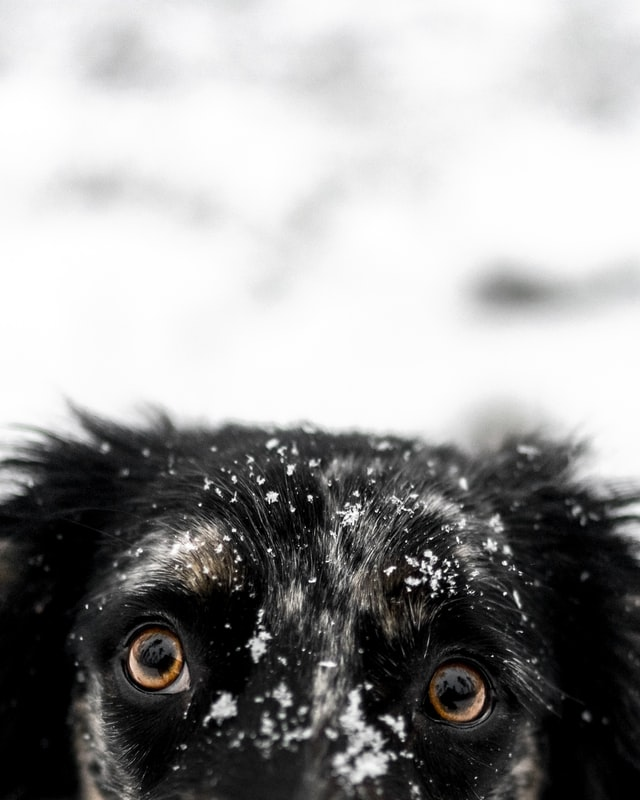

Tbf7H8d2YcU.jpg


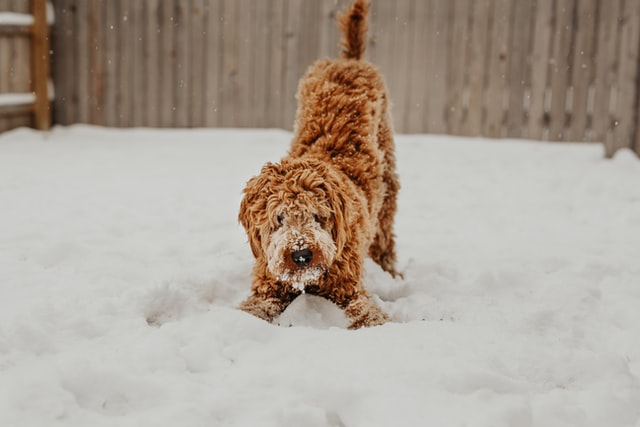

JAjrbewMbFQ.jpg


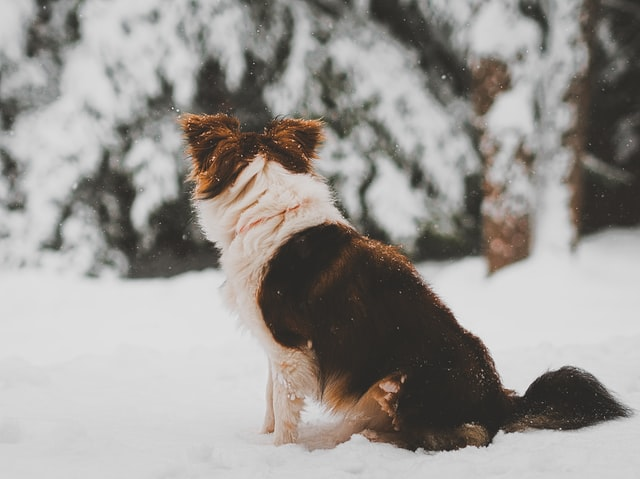

In [ ]:
search("A dog is playing in the snow")

Query:


'Two dogs playing in the snow'

FAcSe7SjDUU.jpg


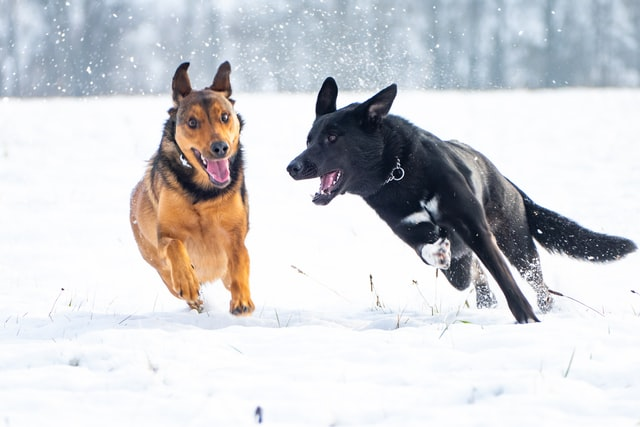

lyStEjlKNSw.jpg


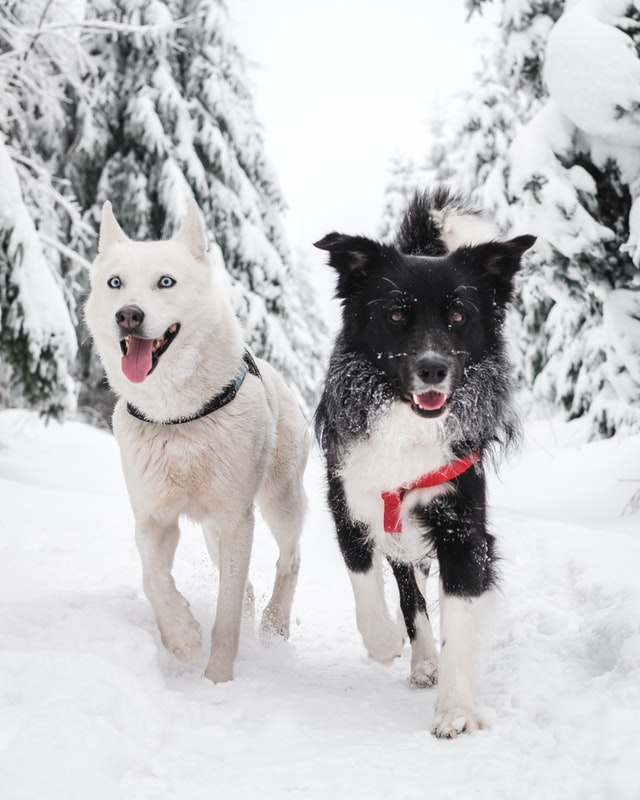

Hb6nGDgWztE.jpg


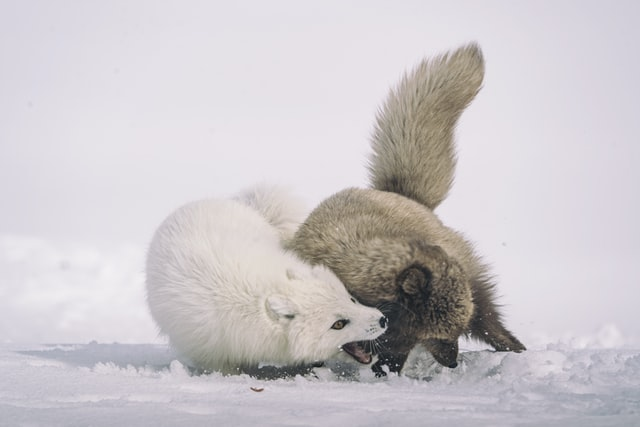

In [ ]:
search("Two dogs playing in the snow")

Query:


'A rraining weather'

p4xNF5ZPc0c.jpg


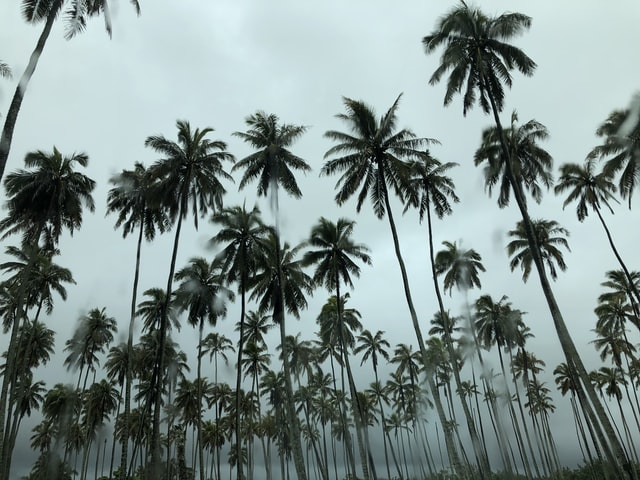

RLGEHPY2yRM.jpg


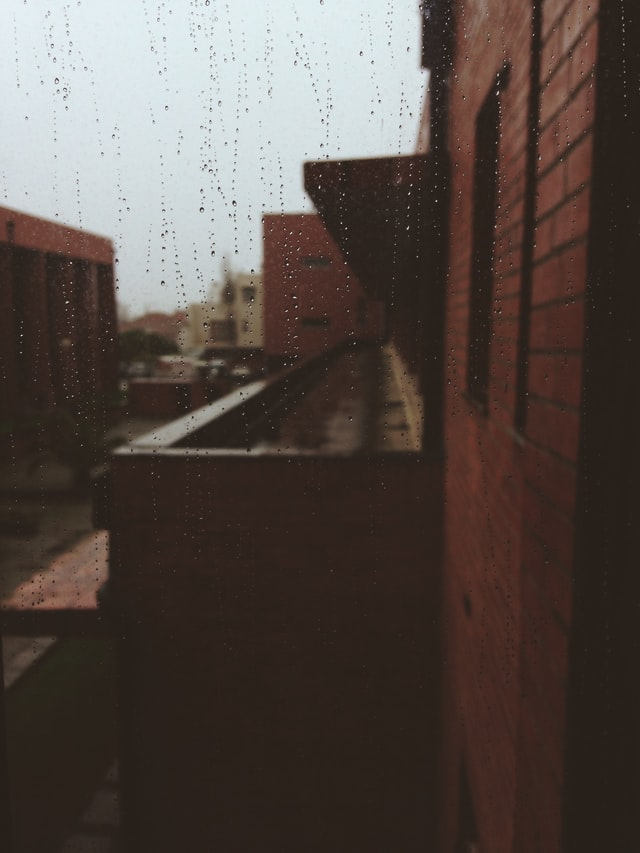

7bDaUdMEOJc.jpg


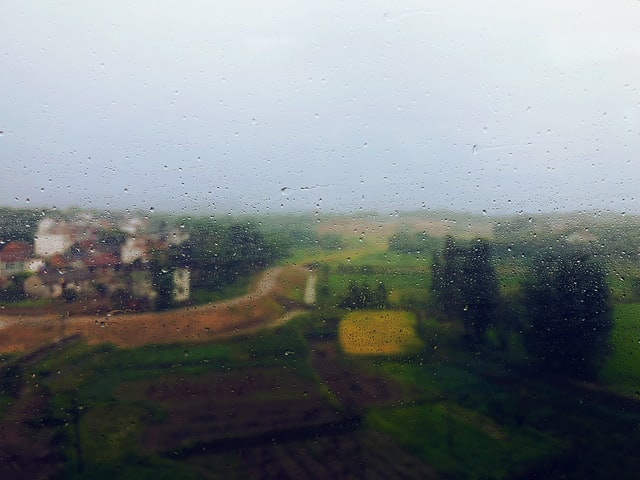

In [ ]:
search("A rraining weather")

Query:


'A sunset on the beach'

nfQ2QGhdQNc.jpg


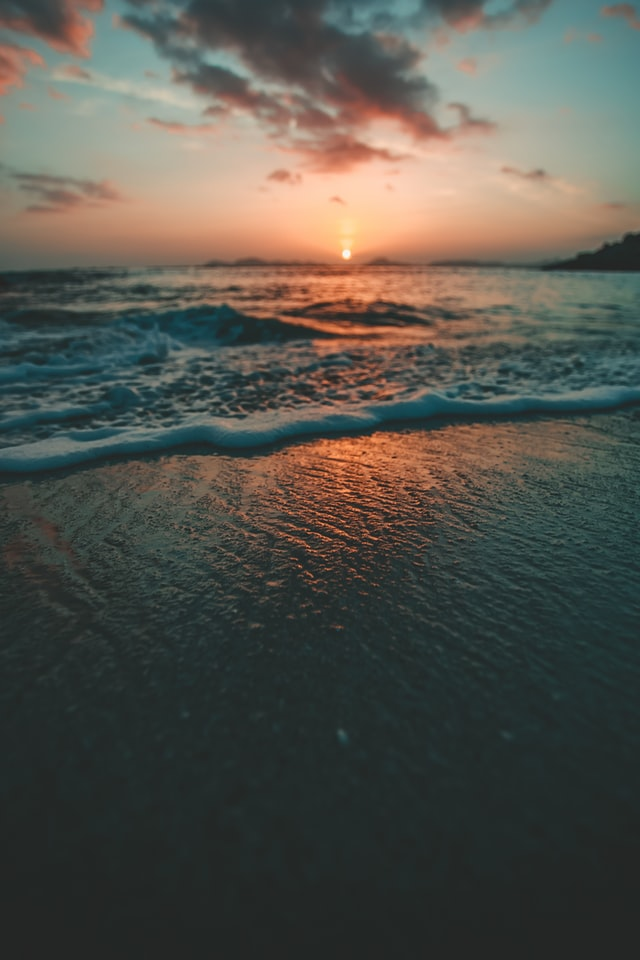

JC5U3Eyiyr4.jpg


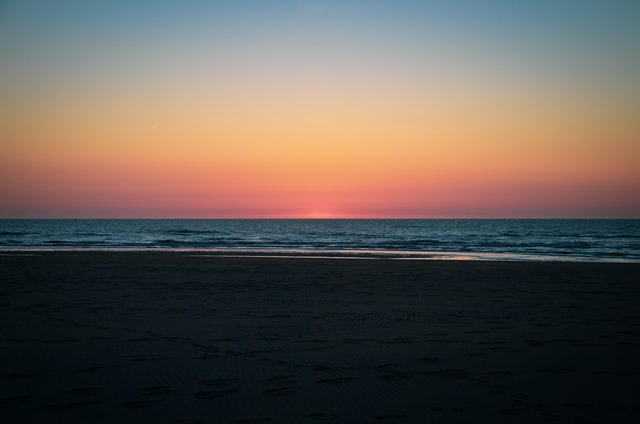

vlukOqxOA8o.jpg


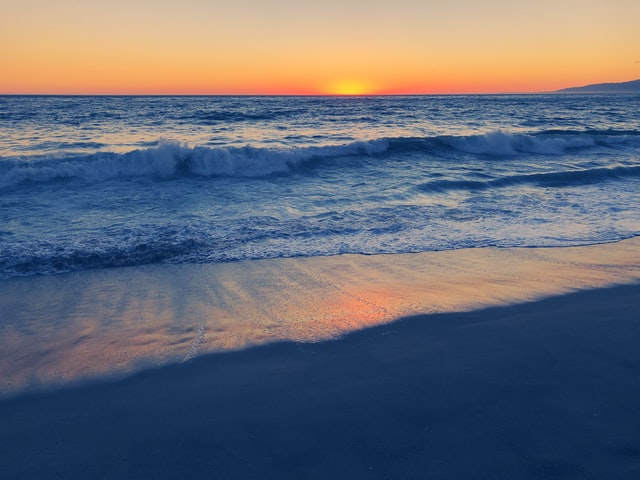

In [ ]:
search("A sunset on the beach")

Query:


'Copenhaghen'

uHsQou9tWTQ.jpg


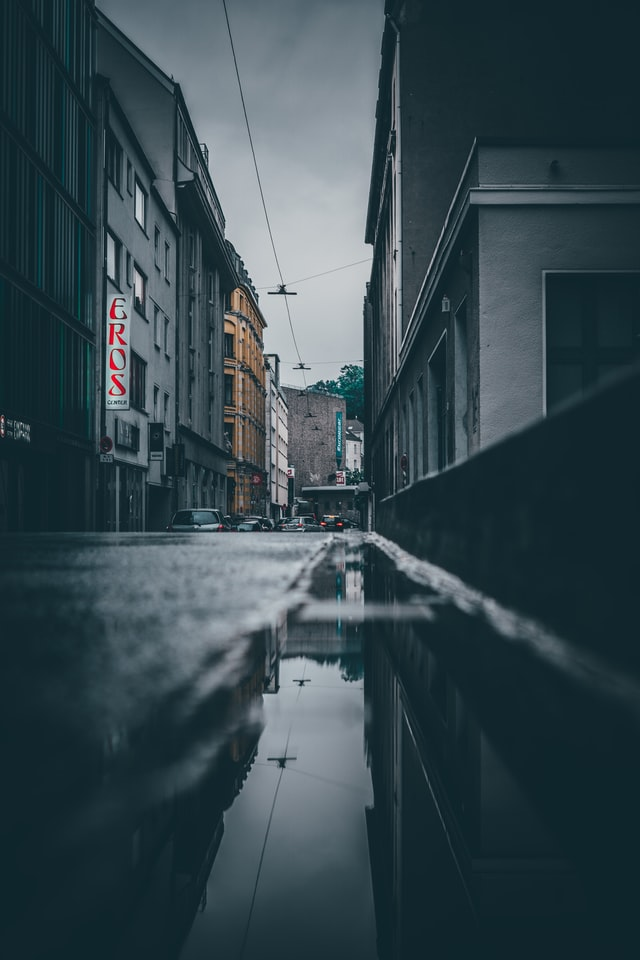

Fyxq6Paxskw.jpg


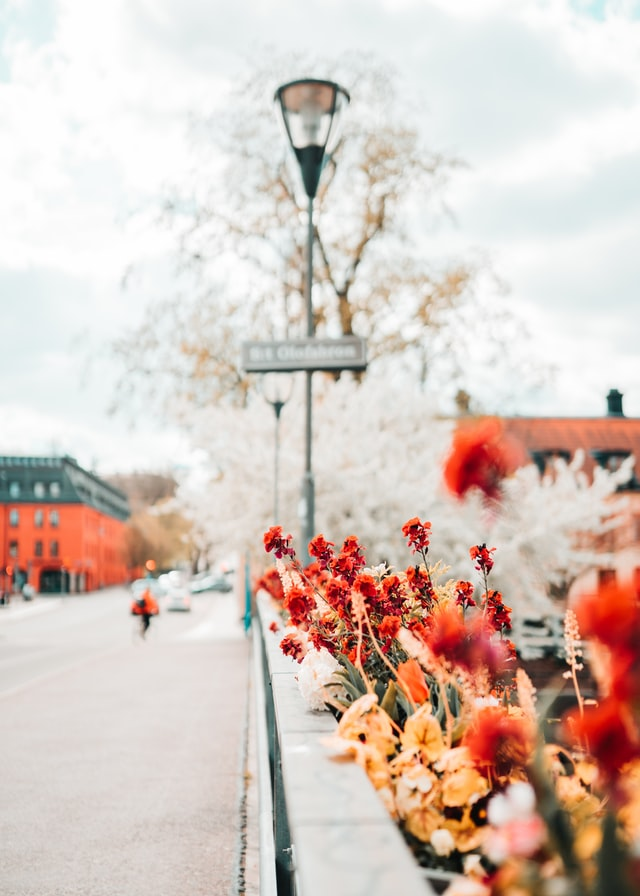

aK1c7A93qQA.jpg


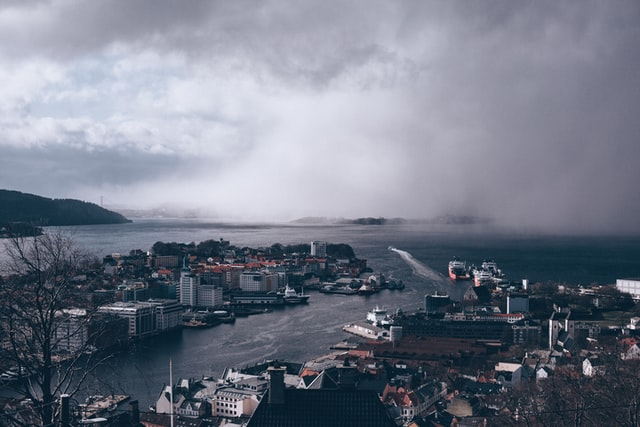

In [ ]:
search("Copenhaghen")

Query:


'London'

UnGcRvTyJOo.jpg


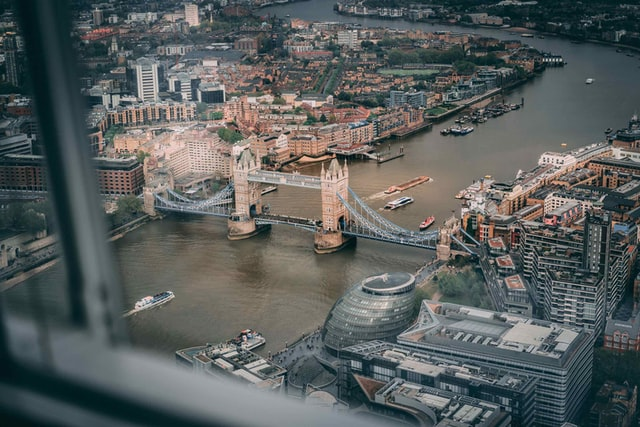

S3G8qX4Ft5s.jpg


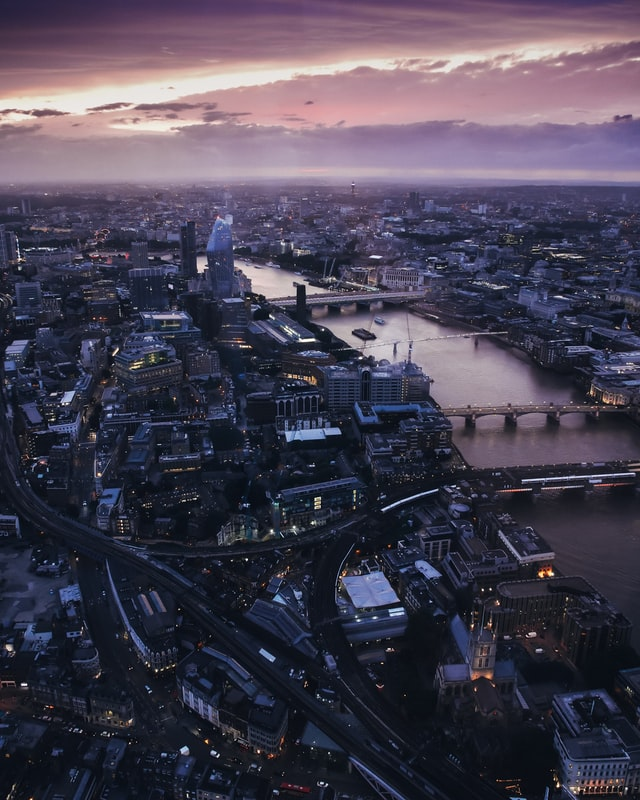

t05kfHeygbE.jpg


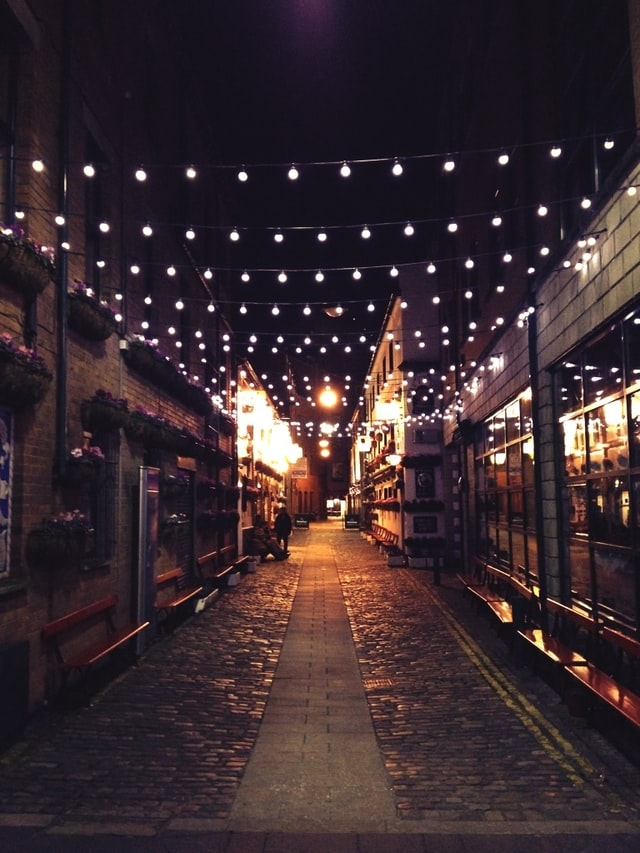

In [ ]:
search("London")

Query:


'A dog in a street'

pCyF1HIMovI.jpg


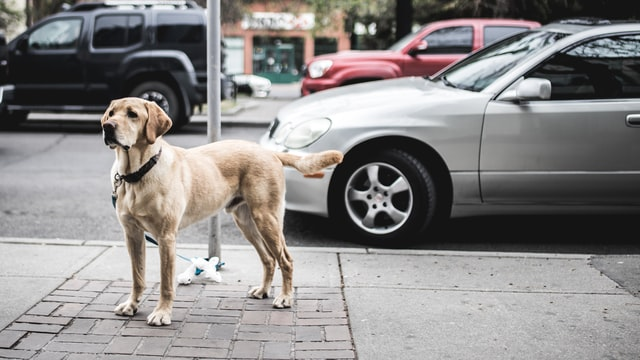

594qUM8szwk.jpg


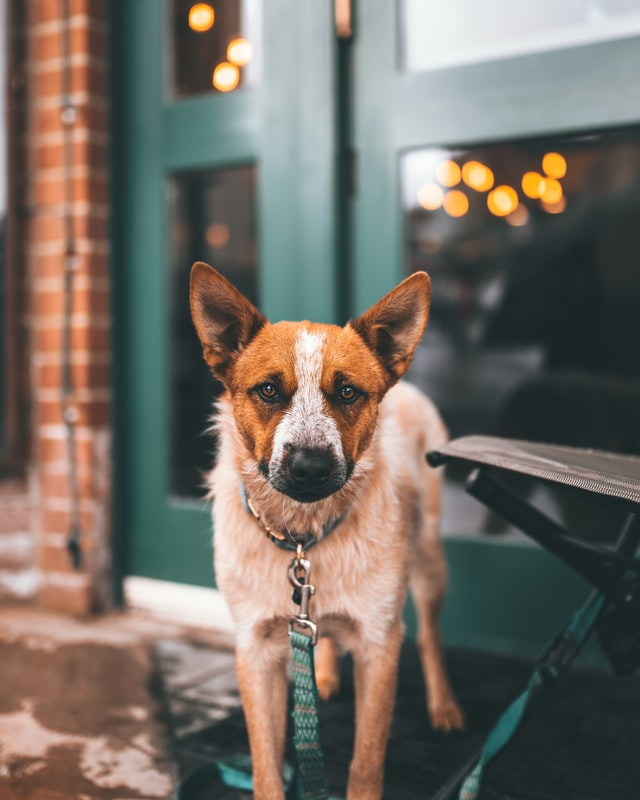

I_PBuIa3Bm8.jpg


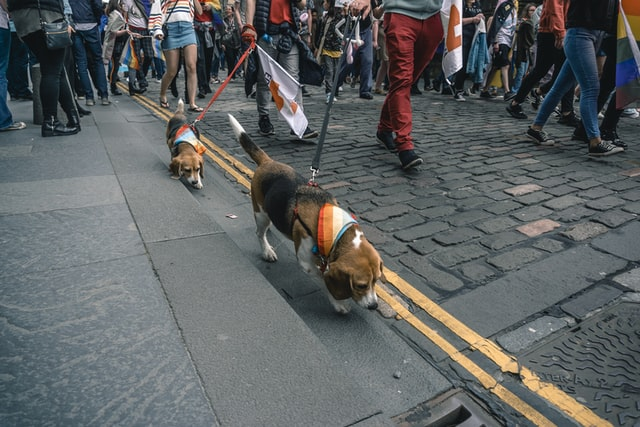

In [ ]:
search("A dog in a street")

Query:


'india'

c4haFZYuRq4.jpg


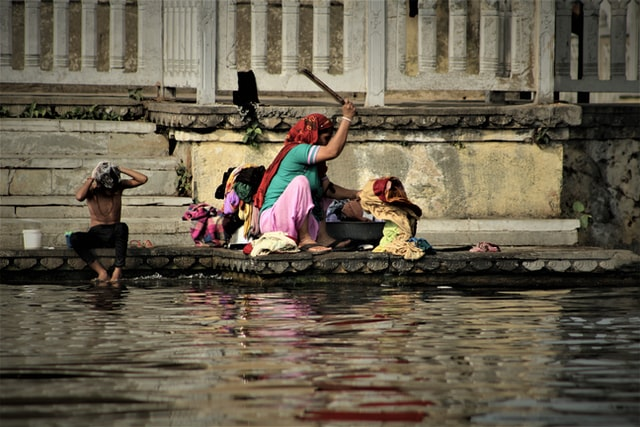

7BDP97v-tT8.jpg


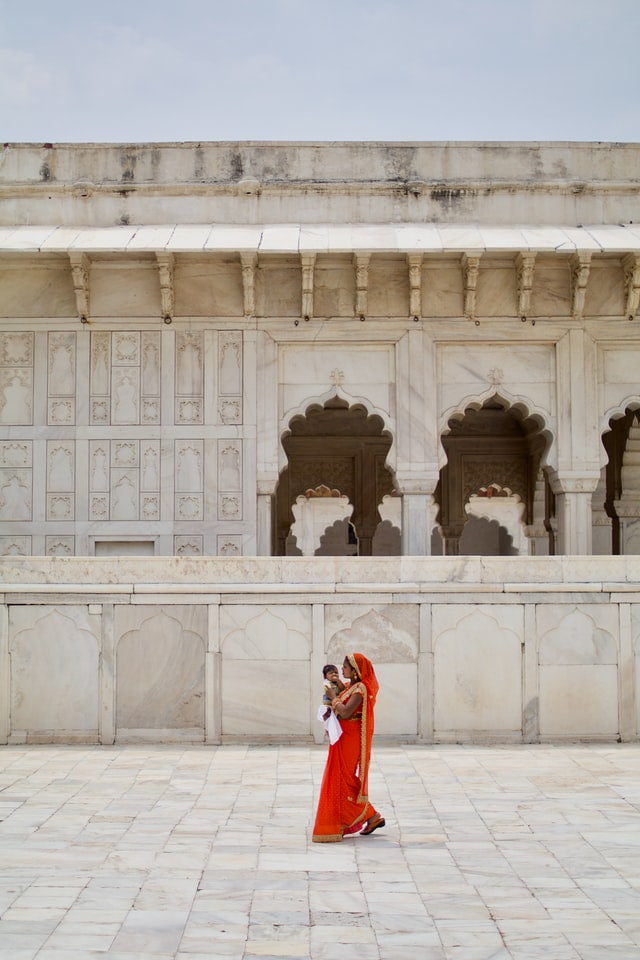

h5_9VPIUz9A.jpg


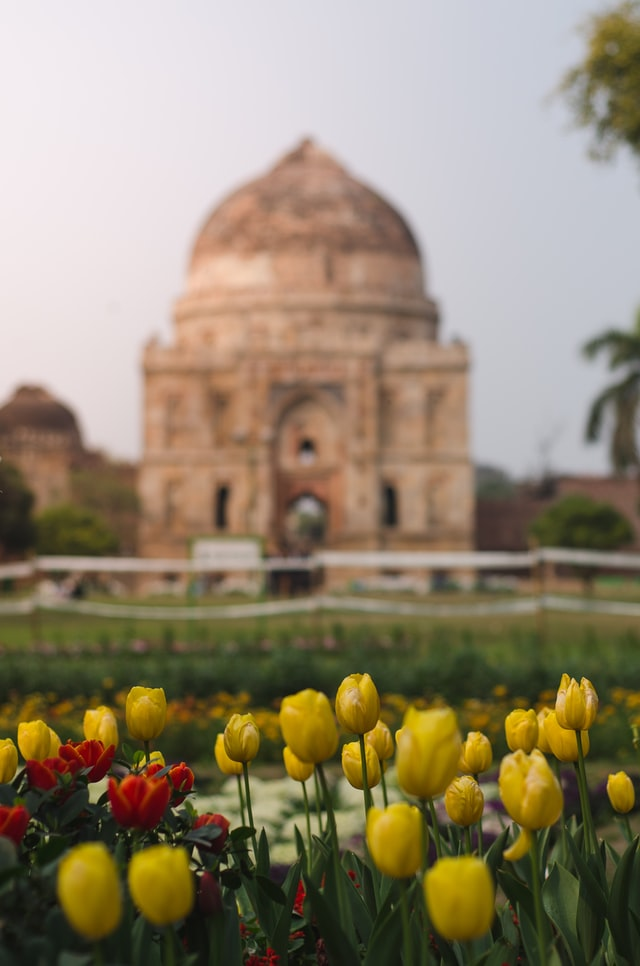

In [ ]:
search("india")

Query:


'A beach with waves'

XDYZo7BEwpA.jpg


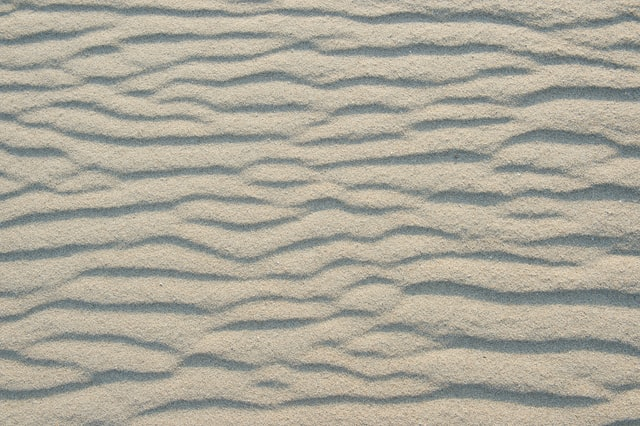

SzG7ZU_CF3c.jpg


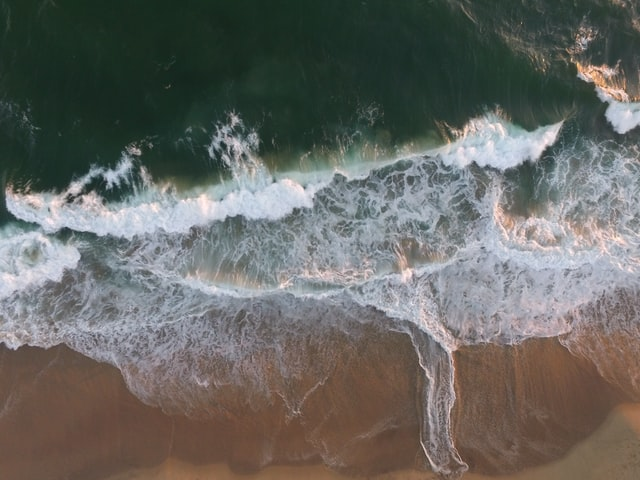

UQRYf8au0rk.jpg


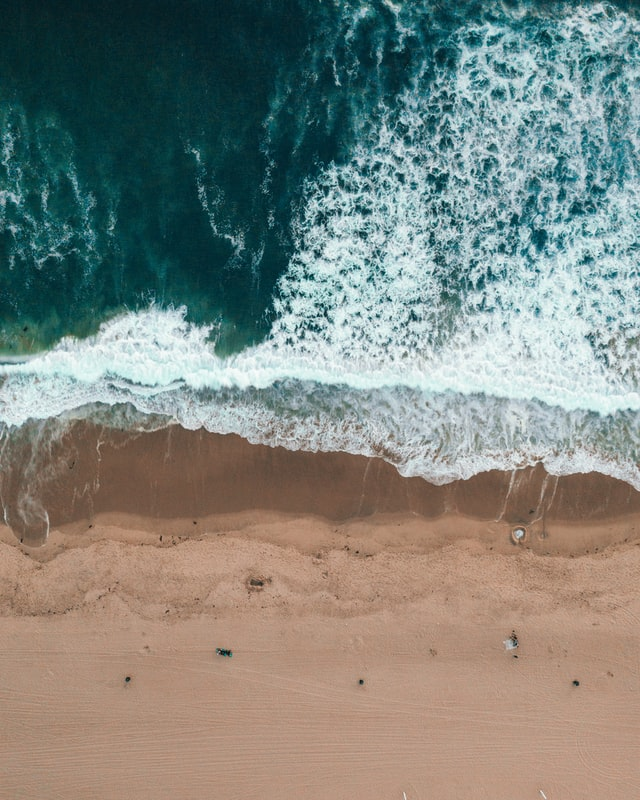

In [ ]:
search("A beach with waves")

# Image-to-Image Search
You can use the method also for image-to-image search.

To achieve this, you pass `Image.open('path/to/image.jpg')` to the search method.

It will then return similar images

Query:


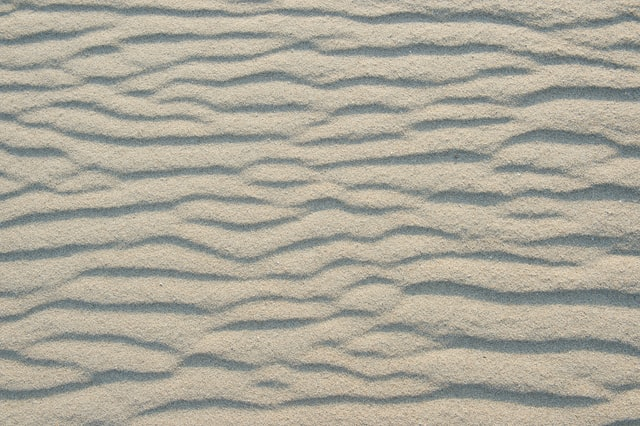

XDYZo7BEwpA.jpg


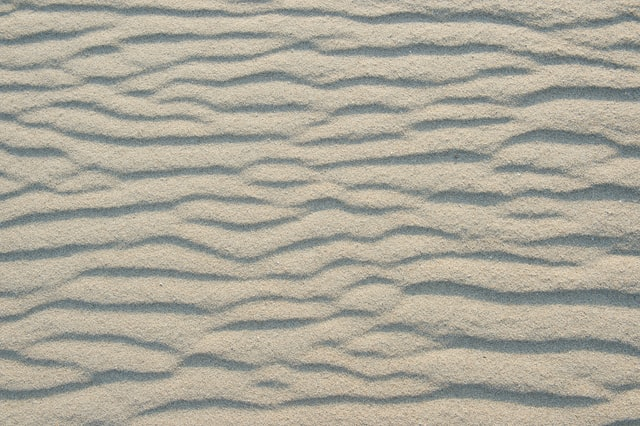

mZabJ9h8_jc.jpg


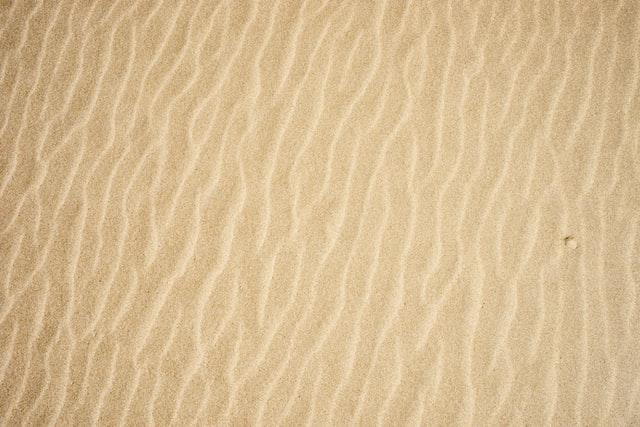

47oFSaPx-x8.jpg


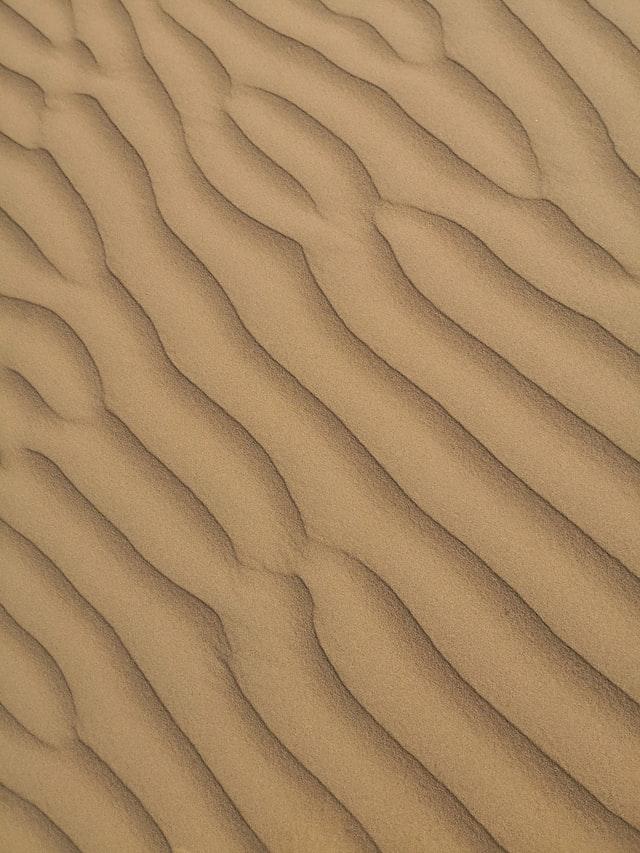

akVOtDCRubM.jpg


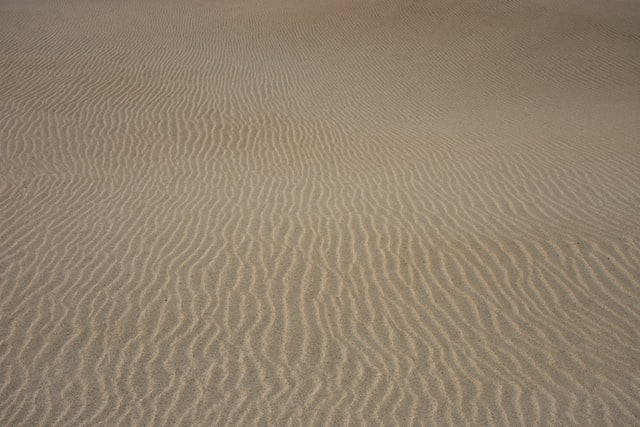

HTKtIsFmwVQ.jpg


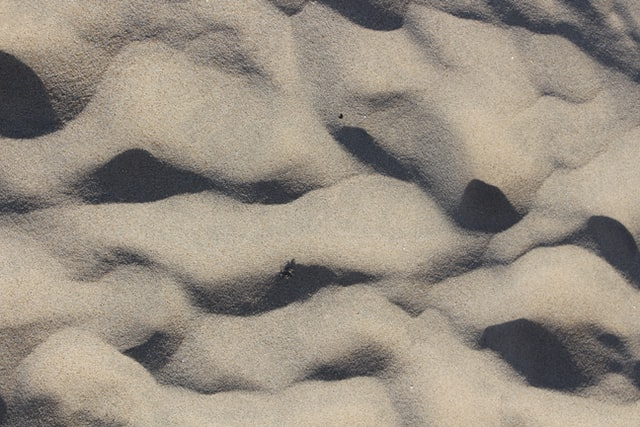

In [ ]:
search(Image.open(os.path.join(img_folder, 'XDYZo7BEwpA.jpg')), k=5)